In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
car = pd.read_csv("C:\\Users\\Chetan Yewale\\Downloads\\Cars.csv")

In [6]:
car.columns

Index(['HP', 'MPG', 'VOL', 'SP', 'WT'], dtype='object')

In [7]:
type(car)

pandas.core.frame.DataFrame

In [8]:
car.head(10)

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
5,70,45.696322,89,113.185353,29.591768
6,55,50.013401,92,105.461264,30.308480
7,62,46.716554,50,102.598513,15.847758
8,62,46.716554,50,102.598513,16.359484
9,80,42.299078,94,115.645204,30.920154


In [9]:
 ### correlation Matrix

In [10]:
car.corr() ### we see high collinearity between 2 input variables i.e (HP & SP) (VOL & WT)

,HP,MPG,VOL,SP,WT
HP,1.000000,-0.725038,0.077459,0.973848,0.076513
MPG,-0.725038,1.000000,-0.529057,-0.687125,-0.526759
VOL,0.077459,-0.529057,1.000000,0.102170,0.999203
SP,0.973848,-0.687125,0.102170,1.000000,0.102439
WT,0.076513,-0.526759,0.999203,0.102439,1.000000


In [11]:
### scatter plot between 2 variables along with histogram

In [12]:
!pip install seaborn

In [13]:
import seaborn as sns

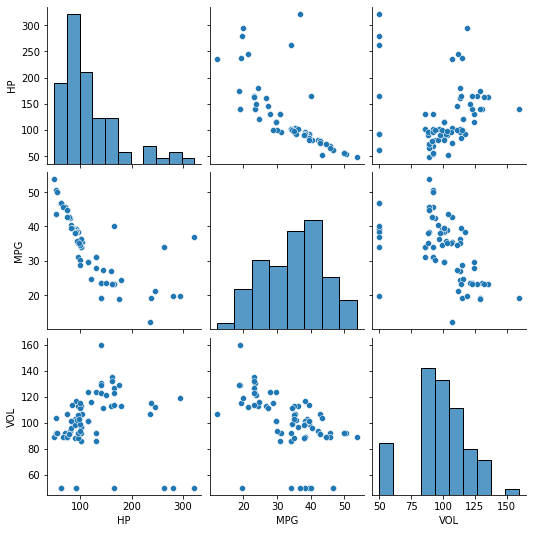

In [14]:
sns.pairplot(car.iloc[:,:3])    #####  iloc[:rows,:columns]

In [15]:
### model building by using statsmodel

In [16]:
!pip install statsmodels --upgrade

In [17]:
import statsmodels.formula.api as smf

In [18]:
car.columns

Index(['HP', 'MPG', 'VOL', 'SP', 'WT'], dtype='object')

In [19]:
model_1 = smf.ols("MPG~HP+VOL+SP+WT",data = car).fit()

In [20]:
model_1.params

Intercept    30.677336
HP           -0.205444
VOL          -0.336051
SP            0.395627
WT            0.400574
dtype: float64

In [21]:
model_1.summary() ## adj r2 = 0.758

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     63.80
Date:                Mon, 04 Oct 2021   Prob (F-statistic):           1.54e-23
Time:                        18:39:26   Log-Likelihood:                -233.96
No. Observations:                  81   AIC:                             477.9
Df Residuals:                      76   BIC:                             489.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.6773     14.900      2.059      0.043       1.001      60.354
HP            -0.2054      0.039     -5.239      0.000      -0.284      -0.127
VOL           -0.3361      0.569     -0.591      0.556      -1.469       0.796
SP             0.3956      0.158      2.500      0.015       0.080       0.711
WT             0.4006      1.693      0.237      0.814      -2.972       3.773
==============================================================================
Omnibus:                       10.780   Durbin-Watson:                   1.403
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               11.722
Skew:                           0.707   Prob(JB):                      0.00285
Kurtosis:                       4.215   Cond. No.                     6.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
#### we see in model_1.params there is minus values of VOL & HP , we will have to take out these values

In [23]:
### but there is correlation in between them

In [24]:
## so we check the regression individually

In [25]:
model_vol = smf.ols("MPG~VOL", data = car).fit()

In [26]:
model_vol.summary()  ## adj R2 = 0.271 ## p Value < 0.05 so its significant

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.280
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     30.71
Date:                Mon, 04 Oct 2021   Prob (F-statistic):           3.82e-07
Time:                        18:39:27   Log-Likelihood:                -280.28
No. Observations:                  81   AIC:                             564.6
Df Residuals:                      79   BIC:                             569.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     55.8171      3.957     14.106      0.000      47.941      63.693
VOL           -0.2166      0.039     -5.541      0.000      -0.294      -0.139
==============================================================================
Omnibus:                        2.691   Durbin-Watson:                   0.566
Prob(Omnibus):                  0.260   Jarque-Bera (JB):                1.997
Skew:                          -0.263   Prob(JB):                        0.368
Kurtosis:                       3.562   Cond. No.                         462.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
#### 

In [28]:
model_wt = smf.ols("MPG~WT",data = car).fit()

In [29]:
model_wt.summary() ### adj R2 = 0.268

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.268
Method:                 Least Squares   F-statistic:                     30.34
Date:                Mon, 04 Oct 2021   Prob (F-statistic):           4.38e-07
Time:                        18:39:27   Log-Likelihood:                -280.42
No. Observations:                  81   AIC:                             564.8
Df Residuals:                      79   BIC:                             569.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     55.2296      3.876     14.249      0.000      47.514      62.945
WT            -0.6420      0.117     -5.508      0.000      -0.874      -0.410
==============================================================================
Omnibus:                        2.735   Durbin-Watson:                   0.555
Prob(Omnibus):                  0.255   Jarque-Bera (JB):                2.045
Skew:                          -0.263   Prob(JB):                        0.360
Kurtosis:                       3.573   Cond. No.                         149.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
##

In [31]:
model_vol_wt = smf.ols("MPG~VOL+WT",data = car).fit() 

In [32]:
model_vol_wt.summary() ## adj R2 = 0.264

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.264
Method:                 Least Squares   F-statistic:                     15.33
Date:                Mon, 04 Oct 2021   Prob (F-statistic):           2.43e-06
Time:                        18:39:27   Log-Likelihood:                -280.16
No. Observations:                  81   AIC:                             566.3
Df Residuals:                      78   BIC:                             573.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     56.8847      4.534     12.546      0.000      47.858      65.912
VOL           -0.6983      0.984     -0.710      0.480      -2.658       1.261
WT             1.4349      2.929      0.490      0.626      -4.397       7.266
==============================================================================
Omnibus:                        2.405   Durbin-Watson:                   0.591
Prob(Omnibus):                  0.300   Jarque-Bera (JB):                1.712
Skew:                          -0.251   Prob(JB):                        0.425
Kurtosis:                       3.506   Cond. No.                         597.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
## both coeffiecient P values became insignificant ..

In [34]:
## so there maybe a chance of selecting any1 of VOL & WT

In [35]:
## CHecking weather the data has any influential Values

In [36]:
## influence index plot

In [37]:
import statsmodels.api as sm

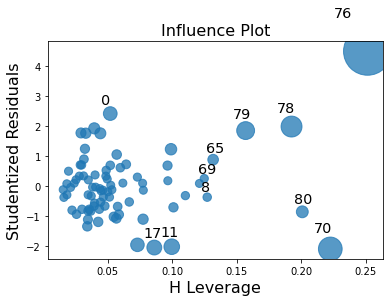

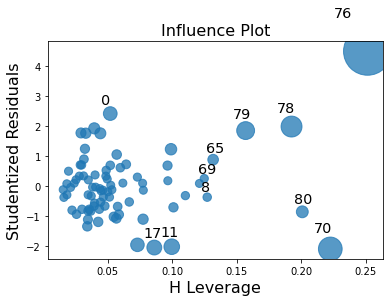

In [38]:
sm.graphics.influence_plot(model_1)  ### 76 and 70 records are outliers so we remove these records

In [39]:
### studentized resudiual = residual / std deviation of residual

In [40]:
cars_new = car.drop(car.index[[70,76]],axis = 0)

In [41]:
#### Preparing new model

In [42]:
model_nw = smf.ols("MPG~WT + VOL + HP + SP",data = cars_new).fit()

In [43]:
model_nw.params

Intercept    25.262686
WT           -0.130515
VOL          -0.138784
HP           -0.229533
SP            0.443356
dtype: float64

In [44]:
model_nw.summary() ##adj R2 = 0.80

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     82.15
Date:                Mon, 04 Oct 2021   Prob (F-statistic):           1.89e-26
Time:                        18:39:35   Log-Likelihood:                -219.05
No. Observations:                  79   AIC:                             448.1
Df Residuals:                      74   BIC:                             460.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     25.2627     13.495      1.872      0.065      -1.627      52.152
WT            -0.1305      1.519     -0.086      0.932      -3.158       2.897
VOL           -0.1388      0.510     -0.272      0.786      -1.155       0.877
HP            -0.2295      0.035     -6.489      0.000      -0.300      -0.159
SP             0.4434      0.144      3.081      0.003       0.157       0.730
==============================================================================
Omnibus:                        6.476   Durbin-Watson:                   1.126
Prob(Omnibus):                  0.039   Jarque-Bera (JB):                5.764
Skew:                           0.617   Prob(JB):                       0.0560
Kurtosis:                       3.479   Cond. No.                     6.00e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  6e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [45]:
model_nw.conf_int(0.01)

,0,1
Intercept,-10.416762,60.942135
WT,-4.147683,3.886654
VOL,-1.486618,1.209049
HP,-0.323055,-0.136010
SP,0.062873,0.823838


In [46]:
mpg_pred = model_nw.predict(cars_new)

In [47]:
mpg_pred

0     44.101073
1     42.650709
2     42.686370
3     42.732995
4     42.741815
        ...    
75    20.514193
77    16.483189
78    23.110302
79    10.349075
80    13.680984
Length: 79, dtype: float64

In [48]:
cars_new.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [49]:
## calculating VIF values

In [50]:
rsq_hp = smf.ols("HP~SP + VOL + WT",data = cars_new).fit().rsquared   ### root means square values

In [51]:
vif_hp = 1/(1-rsq_hp)  ### 14.92

In [52]:
vif_hp

14.927705081455661

In [53]:
rsq_sp = smf.ols("SP ~ VOL + WT + HP",data = cars_new).fit().rsquared

In [54]:
vif_sp = 1/(1-rsq_sp)  ### 15.290

In [55]:
vif_sp

15.290510890814494

In [56]:
rsq_vol = smf.ols("VOL ~ HP + SP+ WT",data = cars_new).fit().rsquared  #### root means square value

In [57]:
vif_vol = 1/(1-rsq_vol) ## 566.722

In [58]:
vif_vol

566.722324344509

In [59]:
rsq_wt = smf.ols("WT ~ VOL + HP+ SP",data = cars_new).fit().rsquared

In [60]:
vif_wt = 1/(1-rsq_wt) ## 567.77

In [61]:
vif_wt

567.7797106222519

In [62]:
#### storing vif values in variables

In [63]:
d1 = {'Variables':['HP','WT','VOL','SP'], 'VIF' : [vif_hp,vif_wt,vif_vol,vif_sp]}

In [64]:
vif_frame = pd.DataFrame(d1)

In [65]:
type(vif_frame)

pandas.core.frame.DataFrame

In [66]:
##### WT is having Higher VIF value so we are not going to including WT in this prediction model

In [67]:
### added varible plot AVP

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


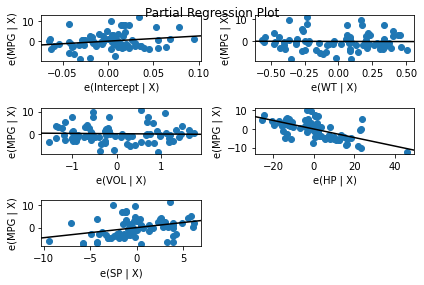

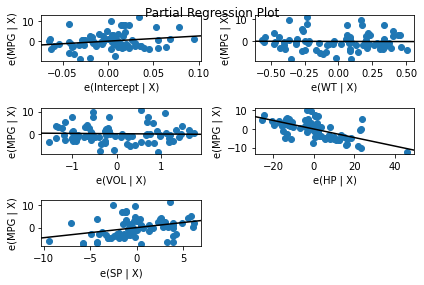

In [68]:
sm.graphics.plot_partregress_grid(model_nw)

In [69]:
final_model = smf.ols("MPG ~ VOL + HP+ SP",data = cars_new).fit()

In [70]:
final_model.params

Intercept    25.527511
VOL          -0.182530
HP           -0.229084
SP            0.441482
dtype: float64

In [71]:
final_model.summary() ### adj R2 = 0.809

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     111.0
Date:                Mon, 04 Oct 2021   Prob (F-statistic):           1.65e-27
Time:                        18:39:40   Log-Likelihood:                -219.06
No. Observations:                  79   AIC:                             446.1
Df Residuals:                      75   BIC:                             455.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     25.5275     13.051      1.956      0.054      -0.471      51.526
VOL           -0.1825      0.023     -8.012      0.000      -0.228      -0.137
HP            -0.2291      0.035     -6.592      0.000      -0.298      -0.160
SP             0.4415      0.141      3.124      0.003       0.160       0.723
==============================================================================
Omnibus:                        6.541   Durbin-Watson:                   1.130
Prob(Omnibus):                  0.038   Jarque-Bera (JB):                5.833
Skew:                           0.620   Prob(JB):                       0.0541
Kurtosis:                       3.485   Cond. No.                     5.76e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.76e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [72]:
mpg_pred = final_model.predict(cars_new)

In [73]:
mpg_pred

0     44.053224
1     42.694424
2     42.694424
3     42.790029
4     42.711109
        ...    
75    20.548675
77    16.491552
78    23.080092
79    10.371281
80    13.670311
Length: 79, dtype: float64

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


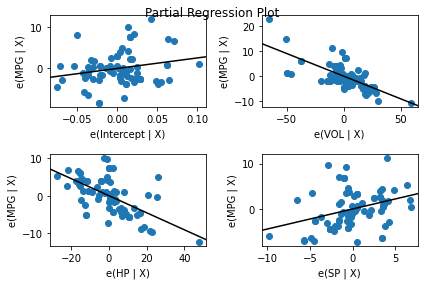

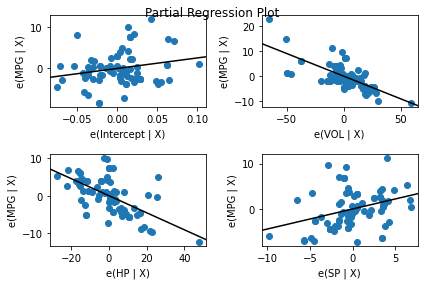

In [74]:
sm.graphics.plot_partregress_grid(final_model)

In [75]:
####### LINEARITY #########

In [76]:
### obsrved values VS fitted Values

Text(0, 0.5, 'predicted values')

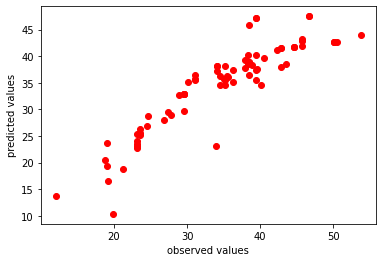

In [77]:
plt.scatter(cars_new.MPG,mpg_pred,c = "r");plt.xlabel("observed values");plt.ylabel("predicted values")

In [78]:
### resid values VS fitted values

Text(0, 0.5, 'residuals')

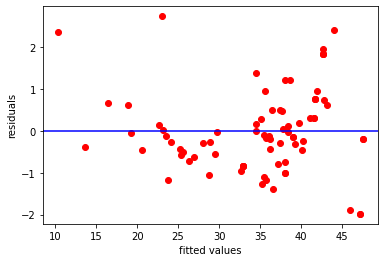

In [79]:
plt.scatter(mpg_pred,final_model.resid_pearson,c ="r");plt.axhline(y = 0,c="blue");plt.xlabel("fitted values");plt.ylabel("residuals")

In [80]:
  ##### NORMALITY PLOT FOR RESIDUALS ######

(array([ 3.,  6., 12., 21., 15., 10.,  4.,  1.,  4.,  3.]),
 array([-1.98480369, -1.51158404, -1.0383644 , -0.56514475, -0.09192511,
         0.38129454,  0.85451418,  1.32773383,  1.80095347,  2.27417312,
         2.74739276]),
 <BarContainer object of 10 artists>)

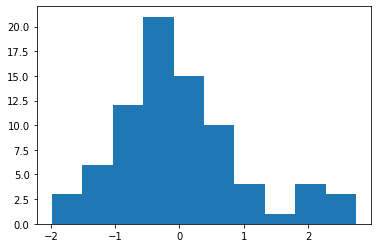

In [82]:
plt.hist(final_model.resid_pearson)

In [83]:
### QQ plot for residual

In [84]:
import pylab

In [85]:
import scipy.stats as st

In [86]:
## checking residuals are normally distributed 

((array([-2.37663702, -2.02958204, -1.82767017, -1.68081377, -1.5632274 ,
         -1.46398099, -1.37736584, -1.30000518, -1.22972736, -1.16504879,
         -1.10490843, -1.04851956, -0.99528161, -0.94472489, -0.89647454,
         -0.8502261 , -0.80572849, -0.76277189, -0.72117887, -0.68079772,
         -0.64149747, -0.60316407, -0.5656973 , -0.52900844, -0.49301835,
         -0.45765594, -0.4228569 , -0.38856265, -0.35471952, -0.32127797,
         -0.288192  , -0.25541861, -0.22291736, -0.19064996, -0.15857989,
         -0.12667214, -0.09489286, -0.06320916, -0.0315888 ,  0.        ,
          0.0315888 ,  0.06320916,  0.09489286,  0.12667214,  0.15857989,
          0.19064996,  0.22291736,  0.25541861,  0.288192  ,  0.32127797,
          0.35471952,  0.38856265,  0.4228569 ,  0.45765594,  0.49301835,
          0.52900844,  0.5656973 ,  0.60316407,  0.64149747,  0.68079772,
          0.72117887,  0.76277189,  0.80572849,  0.8502261 ,  0.89647454,
          0.94472489,  0.99528161,  1.

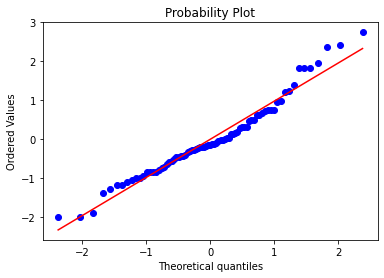

In [87]:
st.probplot(final_model.resid_pearson,dist = "norm",plot = pylab)

In [88]:
#####  splitting into train and test data

In [89]:
from sklearn.model_selection import train_test_split

In [115]:
cars_train,cars_test = train_test_split(cars_new,test_size = 0.3)  ### train test split into 80%, 20 %

In [116]:
### preparing model on train data

In [117]:
train_model = smf.ols("MPG~ VOL+SP+HP",data = cars_train).fit()

In [118]:
train_pred = train_model.predict(cars_train) ### train data prediction

In [119]:
train_resid = train_pred - cars_train.MPG  ### train residual values

In [120]:
### train RMSE

In [121]:
train_rmse = np.sqrt(np.mean(train_resid*train_resid)) ###4.2366

In [122]:
train_rmse

3.906864255652098

In [123]:
#### test prediction

In [124]:
test_pred = train_model.predict(cars_test)

In [125]:
test_resid = test_pred - cars_test.MPG

In [126]:
test_rmse = np.sqrt(np.mean(test_resid*test_resid))  ### 1.83

In [127]:
test_rmse

3.892605685108029